In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('./raw_total_fight_data.csv', delimiter=';')
indexes_not_null = raw_data['Winner'].dropna().index
raw_data = raw_data.loc[indexes_not_null, :]
raw_data

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,4 of 6,1 of 3,66%,33%,20 of 22,9 of 11,...,0 of 2,Submission,1,9:51,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Remco Pardoel
6008,Orlando Wiet,Robert Lucarelli,0,0,8 of 12,2 of 6,66%,33%,11 of 15,2 of 6,...,0 of 0,KO/TKO,1,2:50,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Orlando Wiet
6009,Johnny Rhodes,David Levicki,0,0,11 of 17,4 of 5,64%,80%,74 of 86,95 of 102,...,1 of 1,KO/TKO,1,12:13,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Johnny Rhodes
6010,Patrick Smith,Ray Wizard,0,0,1 of 1,1 of 1,100%,100%,1 of 1,2 of 2,...,0 of 0,Submission,1,0:58,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Patrick Smith


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5902 entries, 0 to 6011
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R_fighter        5902 non-null   object
 1   B_fighter        5902 non-null   object
 2   R_KD             5902 non-null   int64 
 3   B_KD             5902 non-null   int64 
 4   R_SIG_STR.       5902 non-null   object
 5   B_SIG_STR.       5902 non-null   object
 6   R_SIG_STR_pct    5902 non-null   object
 7   B_SIG_STR_pct    5902 non-null   object
 8   R_TOTAL_STR.     5902 non-null   object
 9   B_TOTAL_STR.     5902 non-null   object
 10  R_TD             5902 non-null   object
 11  B_TD             5902 non-null   object
 12  R_TD_pct         5902 non-null   object
 13  B_TD_pct         5902 non-null   object
 14  R_SUB_ATT        5902 non-null   int64 
 15  B_SUB_ATT        5902 non-null   int64 
 16  R_REV            5902 non-null   int64 
 17  B_REV            5902 non-null   

In [4]:
raw_fighters = pd.read_csv('./raw_fighter_details.csv')
raw_fighters

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,Zhang Tiequan,"5' 8""",155 lbs.,"69""",Orthodox,"Jul 25, 1978",1.23,36%,2.14,51%,1.95,58%,75%,3.4
3592,Alex Zuniga,NaN,145 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3593,George Zuniga,"5' 9""",185 lbs.,NaN,NaN,NaN,7.64,38%,5.45,37%,0.00,0%,100%,0.0
3594,Allan Zuniga,"5' 7""",155 lbs.,"70""",Orthodox,"Apr 04, 1992",3.93,52%,1.80,61%,0.00,0%,57%,1.0


In [5]:
raw_fighters

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,Zhang Tiequan,"5' 8""",155 lbs.,"69""",Orthodox,"Jul 25, 1978",1.23,36%,2.14,51%,1.95,58%,75%,3.4
3592,Alex Zuniga,NaN,145 lbs.,NaN,NaN,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3593,George Zuniga,"5' 9""",185 lbs.,NaN,NaN,NaN,7.64,38%,5.45,37%,0.00,0%,100%,0.0
3594,Allan Zuniga,"5' 7""",155 lbs.,"70""",Orthodox,"Apr 04, 1992",3.93,52%,1.80,61%,0.00,0%,57%,1.0


In [6]:
raw_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fighter_name  3596 non-null   object 
 1   Height        3333 non-null   object 
 2   Weight        3522 non-null   object 
 3   Reach         1684 non-null   object 
 4   Stance        2792 non-null   object 
 5   DOB           2857 non-null   object 
 6   SLpM          3596 non-null   float64
 7   Str_Acc       3596 non-null   object 
 8   SApM          3596 non-null   float64
 9   Str_Def       3596 non-null   object 
 10  TD_Avg        3596 non-null   float64
 11  TD_Acc        3596 non-null   object 
 12  TD_Def        3596 non-null   object 
 13  Sub_Avg       3596 non-null   float64
dtypes: float64(4), object(10)
memory usage: 393.4+ KB


Возникает объективная гипотеза о том, какие признаки действительно являются существенными в определении победителя: 
- возраст бойца
- длина рук
- рост
- вес
- каким стилем дерётся - ударник или борец
- опыт
- насколько боец техничнее своего оппонента

Исходят из этого, можно выудить бесполезные признаки: `Stance`.

In [7]:
exclude_columns = ['Stance']
raw_fighters = raw_fighters.drop(exclude_columns, axis=1)

In [8]:
raw_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fighter_name  3596 non-null   object 
 1   Height        3333 non-null   object 
 2   Weight        3522 non-null   object 
 3   Reach         1684 non-null   object 
 4   DOB           2857 non-null   object 
 5   SLpM          3596 non-null   float64
 6   Str_Acc       3596 non-null   object 
 7   SApM          3596 non-null   float64
 8   Str_Def       3596 non-null   object 
 9   TD_Avg        3596 non-null   float64
 10  TD_Acc        3596 non-null   object 
 11  TD_Def        3596 non-null   object 
 12  Sub_Avg       3596 non-null   float64
dtypes: float64(4), object(9)
memory usage: 365.3+ KB


Добавим колонку, обозначающая год каждого боя, чтобы определить только актуальные данные

In [9]:
raw_data['year'] = raw_data['date'].apply(lambda x: int(x.split(',')[-1].strip()))

In [10]:
values = raw_data['year'].value_counts().sort_values(ascending=False)
indexes = values.index

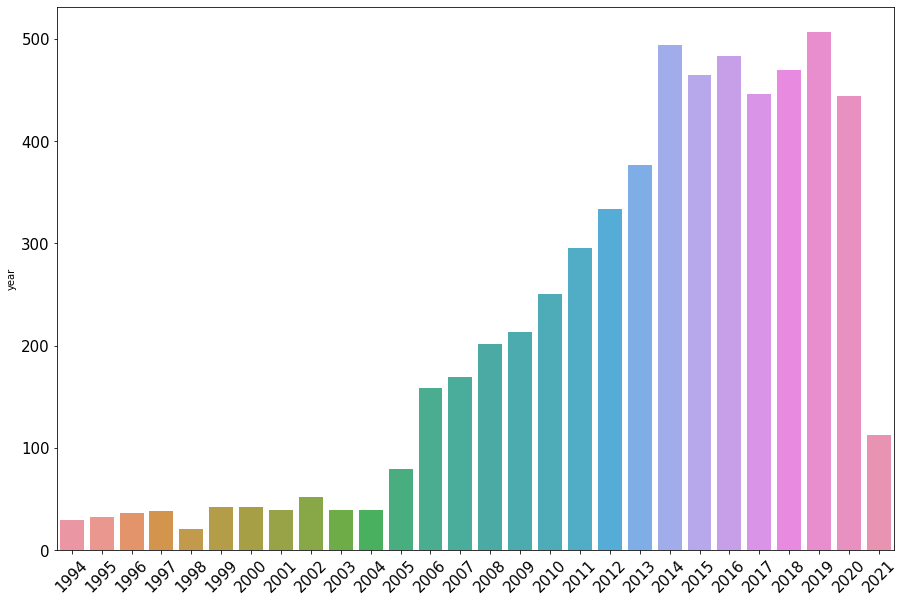

In [11]:
plt.figure(figsize=(15, 10))
sns.barplot(x=indexes, y=values)
ax = plt.gca()
ax.tick_params('x', labelrotation=45, labelsize=15)
ax.tick_params('y', labelsize=15)

Поскольку с 2005 года начинается активное распространнение UFC, то и будем рассматривать датасет, начиная с этого года.

In [12]:
raw_data = raw_data[raw_data['year'] > 2005]

In [13]:
raw_data

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,year
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez,2021
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles,2021
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa,2021
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo,2021
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5508,Spencer Fisher,Aaron Riley,0,0,25 of 65,9 of 23,38%,39%,30 of 70,17 of 32,...,TKO - Doctor's Stoppage,1,5:00,3 Rnd (5-5-5),John McCarthy,"January 16, 2006","Las Vegas, Nevada, USA",Welterweight Bout,Spencer Fisher,2006
5509,Jason Von Flue,Alex Karalexis,0,0,28 of 68,18 of 60,41%,30%,50 of 90,35 of 77,...,Submission,3,1:17,3 Rnd (5-5-5),Steve Mazzagatti,"January 16, 2006","Las Vegas, Nevada, USA",Welterweight Bout,Jason Von Flue,2006
5510,Joshua Burkman,Drew Fickett,0,0,7 of 9,2 of 8,77%,25%,8 of 10,2 of 8,...,Submission,1,1:07,3 Rnd (5-5-5),Mario Yamasaki,"January 16, 2006","Las Vegas, Nevada, USA",Welterweight Bout,Joshua Burkman,2006
5511,Chris Leben,Jorge Rivera,1,0,10 of 17,5 of 10,58%,50%,16 of 23,6 of 11,...,KO/TKO,1,1:44,3 Rnd (5-5-5),John McCarthy,"January 16, 2006","Las Vegas, Nevada, USA",Middleweight Bout,Chris Leben,2006


In [14]:
raw_fighters['fighter_name'].tolist()

['Tom Aaron',
 'Papy Abedi',
 'Shamil Abdurakhimov',
 'Danny Abbadi',
 'Hiroyuki Abe',
 'Ricardo Abreu',
 'Daichi Abe',
 'David Abbott',
 'Klidson Abreu',
 'Daniel Acacio',
 'Scott Adams',
 'Juan Adams',
 'Anthony Adams',
 'Sam Adkins',
 'Israel Adesanya',
 'Zarrukh Adashev',
 'Marcelo Aguiar',
 'Nick Agallar',
 'Mariya Agapova',
 'Edwin Aguilar',
 'Fabio Aguiar',
 'Jessica Aguilar',
 'Kevin Aguilar',
 'Christian Aguilera',
 'Hitomi Akano',
 'Mike Aina',
 'Rostem Akman',
 'Omari Akhmedov',
 'Razak Al-Hassan',
 'Yoshihiro Akiyama',
 'Herdem Alacabek',
 'Mostapha Al-Turk',
 'Javi Alanis',
 'Heili Alateng',
 'Brett Albee',
 'Amir Albazi',
 'Wes Albritton',
 'John Albert',
 'Aleksandra Albu',
 'Junior Albini',
 'Israel Albuquerque',
 'Juan Alcain',
 'Ildemar Alcantara',
 'Alfonso Alcarez',
 'Iuri Alcantara',
 'Gilbert Aldana',
 'Hector Aldana',
 'Irene Aldana',
 'JJ Aldrich',
 'Jose Aldo',
 'Kenneth Alexander',
 'Jim Alers',
 'Houston Alexander',
 'John Alessio',
 'Marcio Alexandre Junior'

In [15]:
fighters_ge_2005 = pd.concat([raw_data['R_fighter'], raw_data['B_fighter']])
fighters_ge_2005 = fighters_ge_2005.unique()
fighters_ge_2005.shape

(1877,)

In [16]:
raw_fighters = raw_fighters[raw_fighters['fighter_name'].isin(fighters_ge_2005)]
raw_fighters

,fighter_name,Height,Weight,Reach,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
1,Papy Abedi,"5' 11""",185 lbs.,NaN,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""","Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
5,Ricardo Abreu,"5' 11""",185 lbs.,NaN,"Apr 27, 1984",3.79,31%,3.98,68%,2.13,42%,100%,0.7
6,Daichi Abe,"5' 11""",170 lbs.,"71""","Nov 27, 1991",3.80,33%,4.49,56%,0.33,50%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,Fares Ziam,"6' 1""",155 lbs.,"75""","Mar 21, 1997",1.90,47%,1.37,66%,0.50,11%,65%,0.0
3586,Cat Zingano,"5' 6""",145 lbs.,"68""","Jul 01, 1982",2.57,61%,1.63,47%,2.77,65%,42%,0.8
3587,Joao Zeferino,"5' 11""",170 lbs.,NaN,"Jan 15, 1986",0.83,36%,2.60,48%,0.50,5%,50%,1.0
3591,Zhang Tiequan,"5' 8""",155 lbs.,"69""","Jul 25, 1978",1.23,36%,2.14,51%,1.95,58%,75%,3.4


In [17]:
raw_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 1 to 3594
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fighter_name  1877 non-null   object 
 1   Height        1875 non-null   object 
 2   Weight        1877 non-null   object 
 3   Reach         1487 non-null   object 
 4   DOB           1852 non-null   object 
 5   SLpM          1877 non-null   float64
 6   Str_Acc       1877 non-null   object 
 7   SApM          1877 non-null   float64
 8   Str_Def       1877 non-null   object 
 9   TD_Avg        1877 non-null   float64
 10  TD_Acc        1877 non-null   object 
 11  TD_Def        1877 non-null   object 
 12  Sub_Avg       1877 non-null   float64
dtypes: float64(4), object(9)
memory usage: 205.3+ KB


Переведем рост из футов в сантиметры

In [18]:
def inches_to_cms(x):
    if x is np.NaN:
        return x
    elif len(x.split("'")) == 2:
        feet = float(x.split("'")[0])
        inches = int(x.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(x.replace('"','')) * 2.54

In [19]:
raw_fighters['Height'] = raw_fighters['Height'].apply(inches_to_cms)
raw_fighters['Height']

1       180.34
2       190.50
3       180.34
5       180.34
6       180.34
         ...  
3582    185.42
3586    167.64
3587    180.34
3591    172.72
3594    170.18
Name: Height, Length: 1877, dtype: float64

In [20]:
raw_fighters['Height']

1       180.34
2       190.50
3       180.34
5       180.34
6       180.34
         ...  
3582    185.42
3586    167.64
3587    180.34
3591    172.72
3594    170.18
Name: Height, Length: 1877, dtype: float64

То же самое проделаем с весом: переведем фунты в килограммы

In [21]:
def lbs_to_kg(x):
    if x is np.NaN:
        return x
    else:
        lbs = x.removesuffix(' lbs.')
        return float(lbs) * 0.45

In [29]:
def pct(x):
    if x is np.NaN:
        return x
    else:
        pct = x.removesuffix('%')
        return float(pct) / 100

In [30]:
raw_fighters['Str_Acc'] = raw_fighters['Str_Acc'].apply(pct)

AttributeError: 'float' object has no attribute 'removesuffix'

In [31]:
raw_fighters

,fighter_name,Height,Weight,Reach,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
1,Papy Abedi,180.34,83.25,NaN,"Jun 30, 1978",2.80,0.55,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,190.50,105.75,"76""","Sep 02, 1981",2.45,0.44,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,180.34,69.75,NaN,"Jul 03, 1983",3.29,0.38,4.41,57%,0.00,0%,77%,0.0
5,Ricardo Abreu,180.34,83.25,NaN,"Apr 27, 1984",3.79,0.31,3.98,68%,2.13,42%,100%,0.7
6,Daichi Abe,180.34,76.50,"71""","Nov 27, 1991",3.80,0.33,4.49,56%,0.33,50%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,Fares Ziam,185.42,69.75,"75""","Mar 21, 1997",1.90,0.47,1.37,66%,0.50,11%,65%,0.0
3586,Cat Zingano,167.64,65.25,"68""","Jul 01, 1982",2.57,0.61,1.63,47%,2.77,65%,42%,0.8
3587,Joao Zeferino,180.34,76.50,NaN,"Jan 15, 1986",0.83,0.36,2.60,48%,0.50,5%,50%,1.0
3591,Zhang Tiequan,172.72,69.75,"69""","Jul 25, 1978",1.23,0.36,2.14,51%,1.95,58%,75%,3.4


In [32]:
raw_fighters.loc[0, :].apply(f)

KeyError: 0

In [28]:
raw_fighters['Weight'] = raw_fighters['Weight'].apply(lbs_to_kg)
raw_fighters['Weight']

1        83.25
2       105.75
3        69.75
5        83.25
6        76.50
         ...  
3582     69.75
3586     65.25
3587     76.50
3591     69.75
3594     69.75
Name: Weight, Length: 1877, dtype: float64

Переведем размах рук в сантиметры, так же, как делали с ростом

In [87]:
raw_fighters['Reach'] = raw_fighters['Reach'].apply(inches_to_cms)
raw_fighters['Reach']

1          NaN
2       193.04
3          NaN
5          NaN
6       180.34
         ...  
3582    190.50
3586    172.72
3587       NaN
3591    175.26
3594    177.80
Name: Reach, Length: 1877, dtype: float64

Теперь создадим свою собственную таблицу, состояющую из боев с 2006-го года.

Теперь добавим колонку `Age`, чтобы численно знать, какой возраст у бойца

In [92]:
pd.to_datetime(raw_fighters.loc[1, 'DOB'])

Timestamp('1978-06-30 00:00:00')

In [88]:
raw_fighters

,fighter_name,Height,Weight,Reach,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
1,Papy Abedi,180.34,83.25,NaN,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,190.50,105.75,193.04,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,180.34,69.75,NaN,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
5,Ricardo Abreu,180.34,83.25,NaN,"Apr 27, 1984",3.79,31%,3.98,68%,2.13,42%,100%,0.7
6,Daichi Abe,180.34,76.50,180.34,"Nov 27, 1991",3.80,33%,4.49,56%,0.33,50%,0%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,Fares Ziam,185.42,69.75,190.50,"Mar 21, 1997",1.90,47%,1.37,66%,0.50,11%,65%,0.0
3586,Cat Zingano,167.64,65.25,172.72,"Jul 01, 1982",2.57,61%,1.63,47%,2.77,65%,42%,0.8
3587,Joao Zeferino,180.34,76.50,NaN,"Jan 15, 1986",0.83,36%,2.60,48%,0.50,5%,50%,1.0
3591,Zhang Tiequan,172.72,69.75,175.26,"Jul 25, 1978",1.23,36%,2.14,51%,1.95,58%,75%,3.4


In [33]:
def get_winner_by_color(X):
    if X['B_fighter'] == X['Winner']:
        return 'Blue'
    elif X['R_fighter'] == X['Winner']:
        return 'Red'
    else:
        return 'Draw'

In [34]:
raw_data[['B_fighter', 'R_fighter', 'Winner']].apply(get_winner_by_color, axis=1)

0        Red
1        Red
2        Red
3       Blue
4       Blue
        ... 
5508     Red
5509     Red
5510     Red
5511     Red
5512     Red
Length: 5414, dtype: object

In [35]:
def f(X):
    if X['Str_Def'][-1] == '%':
        X['Str_Def'] = float(X['Str_Def'].removesuffix('%')) / 100
    if X['TD_Acc'][-1] == '%':
        X['TD_Acc'] = float(X['TD_Acc'].removesuffix('%')) / 100
    if X['TD_Def'][-1] == '%':
        X['TD_Def'] = float(X['TD_Def'].removesuffix('%')) / 100
    return X

In [36]:
raw_fighters.apply(f, axis=1)

,fighter_name,Height,Weight,Reach,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
1,Papy Abedi,180.34,83.25,NaN,"Jun 30, 1978",2.80,0.55,3.15,0.48,3.47,0.57,0.50,1.3
2,Shamil Abdurakhimov,190.50,105.75,"76""","Sep 02, 1981",2.45,0.44,2.45,0.58,1.23,0.24,0.47,0.2
3,Danny Abbadi,180.34,69.75,NaN,"Jul 03, 1983",3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0
5,Ricardo Abreu,180.34,83.25,NaN,"Apr 27, 1984",3.79,0.31,3.98,0.68,2.13,0.42,1.00,0.7
6,Daichi Abe,180.34,76.50,"71""","Nov 27, 1991",3.80,0.33,4.49,0.56,0.33,0.50,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,Fares Ziam,185.42,69.75,"75""","Mar 21, 1997",1.90,0.47,1.37,0.66,0.50,0.11,0.65,0.0
3586,Cat Zingano,167.64,65.25,"68""","Jul 01, 1982",2.57,0.61,1.63,0.47,2.77,0.65,0.42,0.8
3587,Joao Zeferino,180.34,76.50,NaN,"Jan 15, 1986",0.83,0.36,2.60,0.48,0.50,0.05,0.50,1.0
3591,Zhang Tiequan,172.72,69.75,"69""","Jul 25, 1978",1.23,0.36,2.14,0.51,1.95,0.58,0.75,3.4


In [37]:
raw_data

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,year
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez,2021
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles,2021
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa,2021
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo,2021
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5508,Spencer Fisher,Aaron Riley,0,0,25 of 65,9 of 23,38%,39%,30 of 70,17 of 32,...,TKO - Doctor's Stoppage,1,5:00,3 Rnd (5-5-5),John McCarthy,"January 16, 2006","Las Vegas, Nevada, USA",Welterweight Bout,Spencer Fisher,2006
5509,Jason Von Flue,Alex Karalexis,0,0,28 of 68,18 of 60,41%,30%,50 of 90,35 of 77,...,Submission,3,1:17,3 Rnd (5-5-5),Steve Mazzagatti,"January 16, 2006","Las Vegas, Nevada, USA",Welterweight Bout,Jason Von Flue,2006
5510,Joshua Burkman,Drew Fickett,0,0,7 of 9,2 of 8,77%,25%,8 of 10,2 of 8,...,Submission,1,1:07,3 Rnd (5-5-5),Mario Yamasaki,"January 16, 2006","Las Vegas, Nevada, USA",Welterweight Bout,Joshua Burkman,2006
5511,Chris Leben,Jorge Rivera,1,0,10 of 17,5 of 10,58%,50%,16 of 23,6 of 11,...,KO/TKO,1,1:44,3 Rnd (5-5-5),John McCarthy,"January 16, 2006","Las Vegas, Nevada, USA",Middleweight Bout,Chris Leben,2006


In [38]:
df = raw_data.copy()

In [39]:
df = df.merge(raw_fighters, left_on='R_fighter', right_on='fighter_name', how='left')
df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,Reach,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,"70""","Nov 29, 1993",4.69,0.44,2.31,55%,0.00,0%,100%,0.0
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,"74""","Aug 06, 1992",3.26,0.56,1.88,62%,1.37,80%,79%,0.3
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,"75""","Mar 16, 1993",4.38,0.50,3.44,50%,0.00,0%,46%,0.0
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,"63""","Jun 25, 1995",4.10,0.53,1.67,65%,0.00,0%,60%,0.0
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,"68""","Jun 20, 1977",3.29,0.41,3.37,61%,0.66,63%,50%,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Spencer Fisher,Aaron Riley,0,0,25 of 65,9 of 23,38%,39%,30 of 70,17 of 32,...,"68""","May 09, 1976",3.17,0.43,3.03,64%,0.67,30%,60%,0.8
5410,Jason Von Flue,Alex Karalexis,0,0,28 of 68,18 of 60,41%,30%,50 of 90,35 of 77,...,NaN,"Aug 01, 1975",1.89,0.36,3.23,52%,0.62,16%,58%,1.5
5411,Joshua Burkman,Drew Fickett,0,0,7 of 9,2 of 8,77%,25%,8 of 10,2 of 8,...,"72""","Apr 10, 1980",2.69,0.43,3.13,51%,2.53,36%,72%,0.3
5412,Chris Leben,Jorge Rivera,1,0,10 of 17,5 of 10,58%,50%,16 of 23,6 of 11,...,"73""","Jul 21, 1980",2.87,0.42,2.87,52%,1.14,41%,53%,0.8


In [40]:
df = df.rename(columns={
    'Height': 'R_Height',
    'Weight': 'R_Weight',
    'Reach': 'R_Reach',
    'DOB': 'R_DOB'
})

In [41]:
df = df.merge(raw_fighters, left_on='B_fighter', right_on='fighter_name', how='left')
df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,Reach,DOB,SLpM_y,Str_Acc_y,SApM_y,Str_Def_y,TD_Avg_y,TD_Acc_y,TD_Def_y,Sub_Avg_y
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,"67""","Jun 27, 1989",2.24,0.41,4.65,51%,1.07,50%,27%,0.5
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,"76""","Jul 15, 1988",2.98,0.51,1.75,61%,1.75,50%,33%,2.2
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,"75""","Jan 03, 1989",4.33,0.51,8.44,41%,0.00,0%,0%,0.0
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,"61""","Feb 03, 1993",1.00,0.36,2.07,52%,4.00,80%,0%,2.0
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,"72""","Jul 27, 1991",4.16,0.49,2.17,46%,0.98,21%,64%,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Spencer Fisher,Aaron Riley,0,0,25 of 65,9 of 23,38%,39%,30 of 70,17 of 32,...,"69""","Dec 09, 1980",3.45,0.34,3.78,61%,1.18,34%,60%,0.1
5410,Jason Von Flue,Alex Karalexis,0,0,28 of 68,18 of 60,41%,30%,50 of 90,35 of 77,...,"66""","Sep 20, 1977",2.57,0.42,2.39,54%,2.70,45%,86%,0.9
5411,Joshua Burkman,Drew Fickett,0,0,7 of 9,2 of 8,77%,25%,8 of 10,2 of 8,...,"70""","Dec 14, 1979",2.33,0.41,2.29,57%,1.30,35%,30%,2.2
5412,Chris Leben,Jorge Rivera,1,0,10 of 17,5 of 10,58%,50%,16 of 23,6 of 11,...,"73""","Feb 28, 1972",3.16,0.48,2.64,54%,0.84,50%,63%,0.1


In [42]:
df = df.rename(columns={
    'Height': 'B_Height',
    'Weight': 'B_Weight',
    'Reach': 'B_Reach',
    'DOB': 'B_DOB'
})

In [43]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner', 'year', 'fighter_name_x', 'R_Height',
       'R_Weight', 'R_Reach', 'R_DOB', 'SLpM_x', 'Str_Acc_x', 'SApM_x',
       'Str_Def_x', 'TD_Avg_x', 'TD_Acc_x', 'TD_Def_x', 'Sub_Avg_x',
       'fighter_name_y', 'B_Height', 'B_Weight', 'B_Reach', 'B_DOB', 'SLpM_y',
       'Str_Acc_y', 'SApM_y', 'Str_Def_y', 'TD_Avg_y', 'TD_Acc_y', 'TD_Def_y',
       'Sub_Avg_y'],
      dtype='object')

In [44]:
important_columns = [
    'R_fighter', 'B_fighter', 'Winner', 'R_Height',
    'R_Weight', 'R_Reach', 'R_DOB', 'B_Height', 
    'B_Weight', 'B_Reach', 'B_DOB', 'date']

In [45]:
df = df[important_columns]

In [46]:
a = pd.to_datetime(df['date']) - pd.to_datetime(df['R_DOB'])
a

0       9973 days
1      10453 days
2      10231 days
3       9400 days
4      15979 days
          ...    
5409   10844 days
5410   11126 days
5411    9412 days
5412    9310 days
5413   10514 days
Length: 5414, dtype: timedelta64[ns]

In [47]:
b = pd.to_datetime(df['date']) - pd.to_datetime(df['B_DOB'])
b

0      11589 days
1      11936 days
2      11764 days
3      10272 days
4      10829 days
          ...    
5409    9169 days
5410   10345 days
5411    9530 days
5412   12376 days
5413    9988 days
Length: 5414, dtype: timedelta64[ns]

In [48]:
a / b

0       0.860557
1       0.875754
2       0.869687
3       0.915109
4       1.475575
          ...   
5409    1.182681
5410    1.075495
5411    0.987618
5412    0.752262
5413    1.052663
Length: 5414, dtype: float64

In [49]:
df['R_Age'] = pd.to_datetime(df['date']) - pd.to_datetime(df['R_DOB'])
df['B_Age'] = pd.to_datetime(df['date']) - pd.to_datetime(df['B_DOB'])

In [50]:
df

,R_fighter,B_fighter,Winner,R_Height,R_Weight,R_Reach,R_DOB,B_Height,B_Weight,B_Reach,B_DOB,date,R_Age,B_Age
0,Adrian Yanez,Gustavo Lopez,Adrian Yanez,170.18,60.75,"70""","Nov 29, 1993",165.10,60.75,"67""","Jun 27, 1989","March 20, 2021",9973 days,11589 days
1,Trevin Giles,Roman Dolidze,Trevin Giles,182.88,83.25,"74""","Aug 06, 1992",187.96,92.25,"76""","Jul 15, 1988","March 20, 2021",10453 days,11936 days
2,Tai Tuivasa,Harry Hunsucker,Tai Tuivasa,187.96,118.80,"75""","Mar 16, 1993",187.96,108.45,"75""","Jan 03, 1989","March 20, 2021",10231 days,11764 days
3,Cheyanne Buys,Montserrat Conejo,Montserrat Conejo,160.02,51.75,"63""","Jun 25, 1995",152.40,51.75,"61""","Feb 03, 1993","March 20, 2021",9400 days,10272 days
4,Marion Reneau,Macy Chiasson,Macy Chiasson,167.64,60.75,"68""","Jun 20, 1977",180.34,60.75,"72""","Jul 27, 1991","March 20, 2021",15979 days,10829 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,Spencer Fisher,Aaron Riley,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",172.72,69.75,"69""","Dec 09, 1980","January 16, 2006",10844 days,9169 days
5410,Jason Von Flue,Alex Karalexis,Jason Von Flue,182.88,76.50,NaN,"Aug 01, 1975",172.72,69.75,"66""","Sep 20, 1977","January 16, 2006",11126 days,10345 days
5411,Joshua Burkman,Drew Fickett,Joshua Burkman,177.80,76.50,"72""","Apr 10, 1980",177.80,69.75,"70""","Dec 14, 1979","January 16, 2006",9412 days,9530 days
5412,Chris Leben,Jorge Rivera,Chris Leben,180.34,83.25,"73""","Jul 21, 1980",185.42,83.25,"73""","Feb 28, 1972","January 16, 2006",9310 days,12376 days


Посчитаем количество боёв, проведенных каждым бойцом, до нынешнего боя.

In [51]:
df['date'] = pd.to_datetime(df['date'])

In [55]:
df[((df['R_fighter'] == 'Spencer Fisher') | (df['B_fighter'] == 'Spencer Fisher'))
   & (df['date'] < '2006-03-04')]

,R_fighter,B_fighter,Winner,R_Height,R_Weight,R_Reach,R_DOB,B_Height,B_Weight,B_Reach,B_DOB,date,R_Age,B_Age
5409,Spencer Fisher,Aaron Riley,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",172.72,69.75,"69""","Dec 09, 1980",2006-01-16,10844 days,9169 days


In [61]:
red = 'Spencer Fisher'
fights_red = df[((df['R_fighter'] == red) | (df['B_fighter'] == red)) & 
       (df['date'] < '2021-03-20')]
wins_red = fights_red[fights_red['Winner'] == red]
wins_red

,R_fighter,B_fighter,Winner,R_Height,R_Weight,R_Reach,R_DOB,B_Height,B_Weight,B_Reach,B_DOB,date,R_Age,B_Age
4484,Spencer Fisher,Curt Warburton,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",182.88,69.75,"73""",NaN,2010-10-16,12578 days,NaT
4792,Spencer Fisher,Caol Uno,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",170.18,69.75,"70""","May 08, 1975",2009-06-13,12088 days,12455 days
4931,Spencer Fisher,Shannon Gugerty,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",177.80,69.75,"71""","Dec 30, 1981",2008-10-25,11857 days,9796 days
5001,Spencer Fisher,Jeremy Stephens,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",175.26,65.25,"71""","May 25, 1986",2008-06-21,11731 days,8063 days
5190,Spencer Fisher,Sam Stout,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",175.26,69.75,"70""","Apr 23, 1984",2007-06-12,11356 days,8450 days
5293,Spencer Fisher,Dan Lauzon,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",177.80,69.75,NaN,"Mar 30, 1988",2006-10-14,11115 days,6772 days
5369,Spencer Fisher,Matt Wiman,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",177.80,69.75,"68""","Sep 19, 1983",2006-05-27,10975 days,8286 days
5409,Spencer Fisher,Aaron Riley,Spencer Fisher,170.18,69.75,"68""","May 09, 1976",172.72,69.75,"69""","Dec 09, 1980",2006-01-16,10844 days,9169 days


In [69]:
def get_wins_loses_fights(X):
    red = X['R_fighter']
    blue = X['B_fighter']
    fights_red = df[((df['R_fighter'] == red) | (df['B_fighter'] == red)) & 
       (df['date'] < X['date'])]
    fights_blue = df[((df['R_fighter'] == blue) | (df['B_fighter'] == blue)) & 
       (df['date'] < X['date'])]
    wins_red = fights_red[fights_red['Winner'] == red]
    wins_blue = fights_blue[fights_blue['Winner'] == blue]
    cnt_fights_red = len(fights_red)
    cnt_fights_blue = len(fights_blue)
    cnt_wins_red = len(wins_red)
    cnt_wins_blue = len(wins_blue)
    cnt_loses_red = cnt_fights_red - cnt_wins_red
    cnt_loses_blue = cnt_fights_blue - cnt_wins_blue
    X['R_cnt_fights'] = cnt_fights_red
    X['B_cnt_fights'] = cnt_fights_blue
    X['R_cnt_wins'] = cnt_wins_red
    X['B_cnt_wins'] = cnt_wins_blue
    X['R_cnt_loses'] = cnt_loses_red
    X['B_cnt_loses'] = cnt_loses_blue
    
    return X

In [86]:
df = df.apply(get_wins_loses_fights, axis=1)

Теперь можно составлять итоговую таблицу

In [87]:
def get_winner_by_color(X):
    if X['B_fighter'] == X['Winner']:
        return 'Blue'
    elif X['R_fighter'] == X['Winner']:
        return 'Red'

In [74]:
df['Winner'] = df[['B_fighter', 'R_fighter', 'Winner']].apply(get_winner_by_color, axis=1)

In [84]:
df['B_Reach'] = df['B_Reach'].apply(inches_to_cms)
df['R_Reach'] = df['R_Reach'].apply(inches_to_cms)

In [98]:
df['R/B_Age'] = df['R_Age'] / df['B_Age']
df['R/B_Weight'] = df['R_Weight'] / df['B_Weight']
df['R/B_Height'] = df['R_Height'] / df['B_Height']
df['R/B_Reach'] = df['R_Reach'] / df['B_Reach']

In [99]:
df.columns

Index(['R_fighter', 'B_fighter', 'Winner', 'R_Height', 'R_Weight', 'R_Reach',
       'R_DOB', 'B_Height', 'B_Weight', 'B_Reach', 'B_DOB', 'date', 'R_Age',
       'B_Age', 'B_reach', 'R_reach', 'R_cnt_fights', 'B_cnt_fights',
       'R_cnt_wins', 'B_cnt_wins', 'R_cnt_loses', 'B_cnt_loses', 'R/B_Age',
       'R/B_Weight', 'R/B_Height', 'R/B_Reach', 'R/B_Cnt_fights', 'R_W/L',
       'B_W/L'],
      dtype='object')

In [101]:
finish_columns = ['Winner', 'R/B_Age', 'R/B_Weight', 
                  'R/B_Height', 'R/B_Reach', 'R_cnt_fights', 
                  'B_cnt_fights', 'R_cnt_wins', 'B_cnt_wins', 
                  'R_cnt_loses', 'B_cnt_loses']

In [102]:
df[finish_columns]

,Winner,R/B_Age,R/B_Weight,R/B_Height,R/B_Reach,R_cnt_fights,B_cnt_fights,R_cnt_wins,B_cnt_wins,R_cnt_loses,B_cnt_loses
0,Red,0.860557,1.000000,1.030769,1.044776,1,2,0,0,1,2
1,Red,0.875754,0.902439,0.972973,0.973684,6,2,0,0,6,2
2,Red,0.869687,1.095436,1.000000,1.000000,7,0,0,0,7,0
3,Blue,0.915109,1.000000,1.050000,1.032787,0,0,0,0,0,0
4,Blue,1.475575,1.000000,0.929577,0.944444,10,5,0,0,10,5
...,...,...,...,...,...,...,...,...,...,...,...
5409,Red,1.182681,1.000000,0.985294,0.985507,0,0,0,0,0,0
5410,Red,1.075495,1.096774,1.058824,NaN,0,0,0,0,0,0
5411,Red,0.987618,1.096774,1.000000,1.028571,0,0,0,0,0,0
5412,Red,0.752262,1.000000,0.972603,1.000000,0,0,0,0,0,0


In [103]:
df[finish_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5414 entries, 0 to 5413
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Winner        5414 non-null   object 
 1   R/B_Age       5374 non-null   float64
 2   R/B_Weight    5414 non-null   float64
 3   R/B_Height    5411 non-null   float64
 4   R/B_Reach     4770 non-null   float64
 5   R_cnt_fights  5414 non-null   int64  
 6   B_cnt_fights  5414 non-null   int64  
 7   R_cnt_wins    5414 non-null   int64  
 8   B_cnt_wins    5414 non-null   int64  
 9   R_cnt_loses   5414 non-null   int64  
 10  B_cnt_loses   5414 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 507.6+ KB


In [108]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3714 entries, 0 to 5382
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   R_fighter       3714 non-null   object         
 1   B_fighter       3714 non-null   object         
 2   Winner          3714 non-null   object         
 3   R_Height        3714 non-null   float64        
 4   R_Weight        3714 non-null   float64        
 5   R_Reach         3714 non-null   float64        
 6   R_DOB           3714 non-null   object         
 7   B_Height        3714 non-null   float64        
 8   B_Weight        3714 non-null   float64        
 9   B_Reach         3714 non-null   float64        
 10  B_DOB           3714 non-null   object         
 11  date            3714 non-null   datetime64[ns] 
 12  R_Age           3714 non-null   timedelta64[ns]
 13  B_Age           3714 non-null   timedelta64[ns]
 14  B_reach         3714 non-null   float64 

In [110]:
df = df.dropna()[finish_columns]
df

,Winner,R/B_Age,R/B_Weight,R/B_Height,R/B_Reach,R_cnt_fights,B_cnt_fights,R_cnt_wins,B_cnt_wins,R_cnt_loses,B_cnt_loses
0,Red,0.860557,1.000000,1.030769,1.044776,1,2,0,0,1,2
1,Red,0.875754,0.902439,0.972973,0.973684,6,2,0,0,6,2
4,Blue,1.475575,1.000000,0.929577,0.944444,10,5,0,0,10,5
5,Blue,1.518605,1.068966,1.028571,1.041667,7,4,0,0,7,4
6,Blue,0.878868,1.000000,1.014085,0.934211,5,10,0,0,5,10
...,...,...,...,...,...,...,...,...,...,...,...
5344,Red,1.030236,1.000000,1.000000,0.986486,1,1,0,0,1,1
5345,Red,0.915332,1.000000,0.947368,0.949367,1,2,0,0,1,2
5349,Red,1.246508,1.000000,1.043478,1.057143,1,1,0,0,1,1
5366,Red,1.137851,0.918919,1.013889,1.100000,1,1,0,0,1,1


In [111]:
X = df.drop('Winner', axis=1)
y = df['Winner']

In [113]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [114]:
le = LabelEncoder()
y = le.fit_transform(y)

In [115]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
def train_val_test_split(X, y, test_size=0.2, val=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if val:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size)
        return ((X_train, y_train), (X_val, y_val), (X_test, y_test))
    
    return (X_train, y_train), (X_test, y_test)

In [119]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = train_val_test_split(X, y)

In [120]:
from xgboost import XGBClassifier

In [128]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)],
        early_stopping_rounds=3)

[17:47:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67287
[1]	validation_0-logloss:0.66606
[2]	validation_0-logloss:0.65995
[3]	validation_0-logloss:0.65591
[4]	validation_0-logloss:0.65777
[5]	validation_0-logloss:0.65643
[6]	validation_0-logloss:0.65506
[7]	validation_0-logloss:0.65660
[8]	validation_0-logloss:0.65904


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [130]:
from sklearn.metrics import classification_report

In [132]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      0.33      0.38       275
           1       0.66      0.76      0.71       468

    accuracy                           0.60       743
   macro avg       0.56      0.55      0.55       743
weighted avg       0.58      0.60      0.59       743



In [134]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [142]:
estimators = [
    ('xgb', XGBClassifier(use_label_encoder=False)),
    ('gb_clf', GradientBoostingClassifier()),
    ('svm', SVC()),
    ('log_reg', LogisticRegression())
]

stack = StackingClassifier(estimators=estimators, 
                           final_estimator=RandomForestClassifier(),
                           cv=3)

In [143]:
stack.fit(X_train, y_train)

[17:58:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

StackingClassifier(cv=3,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                      

In [144]:
print(classification_report(y_test, stack.predict(X_test)))

              precision    recall  f1-score   support

           0       0.43      0.32      0.37       275
           1       0.65      0.75      0.70       468

    accuracy                           0.59       743
   macro avg       0.54      0.54      0.53       743
weighted avg       0.57      0.59      0.58       743

